# Lotka - Volterra Model

The model is a complex system of two oridinary differential equations used to modelling interspecific interactions. It was developed independently by Alfred Lotka and Vito Volterra in the 1920's, and is characterized by oscillations in the population size of both predator and prey. It uses a knowledge of interactions between species, its causes and consequences in given ecosystem to describe model's dynamics. 

Depending on interactions between populations we can describe three ecosystems:
- **predation** - one species is a prey the other is predator.
- **competition** - species fight for environmental resources.
- symbiosis - coexistence of at least two species (**mutualism**) as an alternative distinguish: clear benefits are only for one species but without harming the other (**commensalism**) or clear benefits are only for one species with harm done to the other (**parasitism**).

### History of the model

Predator-prey model was proposed parallelly by Vito Volterra as a population model and Alfred Lotka in the theory of autocatalytic chemical reactions in 1910. Volterra proposed this model to explain a phenomenon observed after I World War. After War fishermans have found that populations of predatory fish in Adriatic has increased. It was a paradox for everyone because everyone expexted that poplulation after war should be reduced. Volterra using his model has proved that the increase of number of predators was such a normal phenomenon, because during the war fishing was stopped.

### Abstract

Our work mainly focus on implemention ODE's solvers, which are used to develop Lotka-Voltera model and its phase plot, which we discuss later.

In our work we also cosinder:
- standard form of the L-V Model
- modification of L-V Model: 
    - more realistic Maya model
    - competition between species    
- real-life example
- comparison between numerical methods

To solve ODE's we used Runge-Kutta 4th order method and Euler method. Both of them are used to make comparison of accuracy in the end.

### Basic Model
The origninal L-V model in simplest case (one predator population **P**, one prey population **N**), makes several simplifying assumptions: 
- the prey population will grow exponentially when the predator is absent; 
- the predator population will starve in the absence of the prey population (as opposed to switching to another type of prey); 
- predators can consume infinite quantities of prey; 
- there is no environmental complexity (in other words, both populations are moving randomly through a homogeneous environment)

According to these rules we can formulate the system of differential equations: 

\begin{equation}
    \begin{cases}
        \frac{dN}{dt} = N(a − bP)\\
        \frac{dP}{dt} = P(cN − d)
    \end{cases}
\end{equation}

where _a_, _b_, _c_ and _d_ are positive constants and **P(t)** means number of predators popualtion and **N(t)** number of prey population at time **t**. 

Explanation:
- The prey in the absence of any predation grows unboundedly accoriding to _Malthusian law_ **(aN)**
- Due to predation the prey’s growth rate is reduced by a term proportional to the prey and predator populations **(−bNP)**
- In the absence of any prey for sustenance the predator’s death rate results in exponential decay **(−dP)**
- The prey’s contribution to the predators’ growth rate is **(cNP)**, it's proportional to the available prey as well as to the size of the predator population.

In [147]:
a = 1.0; b = 1.0; c = 1.0; d = 1.0

#F -> (t, N, P)
functions = [lambda F: F[1] * (a - b * F[2]),
             lambda F: F[2] * (c * F[1] -d)]

C:\Users\user\AppData\Local\Temp/ipykernel_13188/1551291355.py:9: RuntimeWarning: invalid value encountered in true_divide
  U = dvx / np.sqrt(dvx**2 + dvy**2)
C:\Users\user\AppData\Local\Temp/ipykernel_13188/1551291355.py:10: RuntimeWarning: invalid value encountered in true_divide
  V = dvy / np.sqrt(dvx**2 + dvy**2)


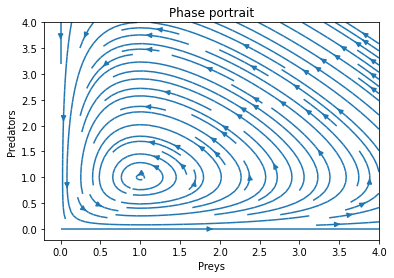

In [148]:
#Phase portrait
phase_plot(functions, 4, 15)

Solutions on a phase plane $ (P,N) $ are placed around neutrally stable critical point at $ (1,1) $. Time at this plot is represented by arrows. The arrows shows variations of $P$ and $N$ as time passes. Due to periodic character of the solutions curves are closed.

### Example

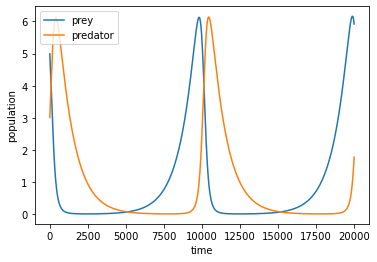

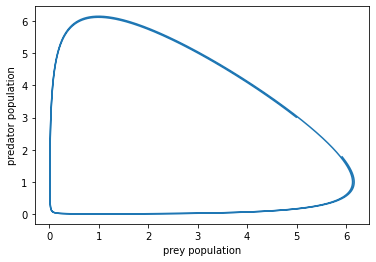

In [14]:
a = 1.0; b = 1.0; c = 1.0; d = 1.0

#F -> (t, N, P)
functions = [lambda F: F[1] * (a - b * F[2]),
             lambda F: F[2] * (c * F[1] -d)]

Y1 = np.array([5.0, 3.0],dtype='d')
# solution
solver = calculate_euler_method(functions, 20, 0, Y1)

data_plot = []
data_plot2 = []

for i in range(0,len(solver)):
    data_plot.append(solver[i][0])
    data_plot2.append(solver[i][1])


plt.plot(data_plot,label="prey")
plt.plot(data_plot2,label="predator")
plt.legend(loc='upper left')
plt.xlabel("time")
plt.ylabel("population")
plt.show()

plt.plot(data_plot,data_plot2)
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.show()

The Lotka–Volterra model does suggest that simple predator–prey interactions can result in periodic behaviour of the populations as was seen above. Huge population of prey makes it possible for predator population to grow. On the other hand declaine of preys makes also a colapse in number of predators. Which in long time makes possible for prey to reproduct. Cycle conitunes. 

### Realistic Predator–Prey Model

We are gonna try to create more realistic model called Maya model, where growth rates should depend on both the prey and predator population sizes as in:

\begin{equation}
    \begin{cases}
        \frac{dN}{dt} = F(N,P) N\\
        \frac{dP}{dt} = G(N,P) P
    \end{cases}
\end{equation}


where the forms of F and G depend on the interaction, the species and so on.

As a reasonable first step we should try to expect the prey to satisfy a logistic growth term, so in absence of predator the prey poplution size doesn't go to infinity and also apply 
environmental capacity on prey [$r(1- \frac{N}{K})$].

\begin{equation*}
  \frac{dN}{dt} = NF(N,P) \quad F(N,P) = r_1(1- \frac{N}{K_1}) - a\frac{P}{1 + aV}
\end{equation*}

where $a\frac{P}{1 + aV}$ describies mortality of prey during hunt, in this case we asume that predator only hunts when he has to.

The predator population equation should also take into account prey population since they are  strictly connected and therefore restricted by this.

\begin{equation*}
  G(N,P) = r_2(1- \frac{P}{NK_2})
\end{equation*}

in this case environmental capacity for the predator is directly proportional to the prey density.

According to new assumptions we can formulate the system of differential equations: 

\begin{equation}
    \begin{cases}
        \frac{dN}{dt} = r_1N(1- \frac{N}{K_1}) - a\frac{NP}{1 + aN} \\
        \frac{dP}{dt} = r_2P(1- \frac{P}{NK_2})
    \end{cases}
\end{equation}



where:
- $r_1$, $r_2$ are fertility rate consecutively for prey and predator
- $K_1$, $K_2$ are maxium environmental capacity
- $a$ effectiveness of predator's hunting 

In [7]:
r1= 1.0;r2 = 1.0
k1 = 1.0; k2 = 1.0
a = 1.0;

#F -> (t, N, P)
functions = [lambda F: F[1] * r1 * (1 - F[1] / k1) - a* (F[1] * F[2])/(1 + a*F[1]) ,
             lambda F: F[2] * r2 * (1 - F[2] / (F[1] * k2))]

C:\Users\user\AppData\Local\Temp/ipykernel_7692/4232136228.py:7: RuntimeWarning: divide by zero encountered in true_divide
  lambda F: F[2] * r2 * (1 - F[2] / (F[1] * k2))]
C:\Users\user\AppData\Local\Temp/ipykernel_7692/4232136228.py:7: RuntimeWarning: invalid value encountered in true_divide
  lambda F: F[2] * r2 * (1 - F[2] / (F[1] * k2))]


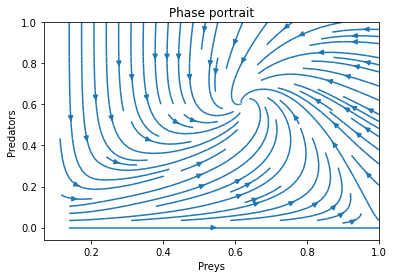

In [8]:
phase_plot(functions, 1, 10)

In this case we can see that both populations seek to stabilize. System tend to aim the equilibrium around $(0.62, 0.62)$

C:\Users\user\AppData\Local\Temp/ipykernel_7692/4232136228.py:7: RuntimeWarning: divide by zero encountered in true_divide
  lambda F: F[2] * r2 * (1 - F[2] / (F[1] * k2))]
C:\Users\user\AppData\Local\Temp/ipykernel_7692/4232136228.py:7: RuntimeWarning: invalid value encountered in true_divide
  lambda F: F[2] * r2 * (1 - F[2] / (F[1] * k2))]


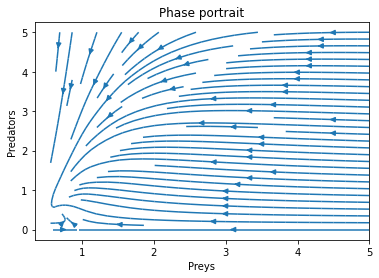

In [9]:
### PHASE PORTAIT STABLE DATA
phase_plot(functions, 5, 10)

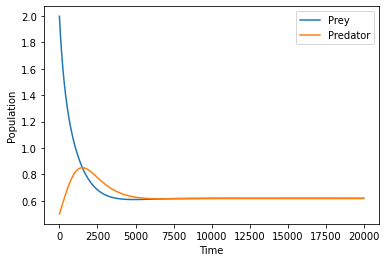

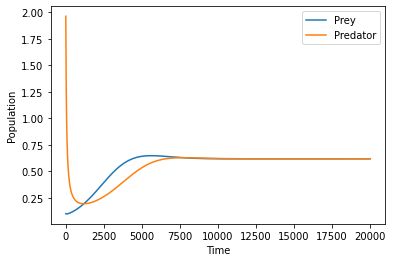

In [10]:
Y1 = [2.0, 0.5]
Y2 = [0.1, 2.0]
### PLOT OF STABLE DATA

solver = runge_kutta_method(functions, 20, 0, Y1)
solver2 = runge_kutta_method(functions, 20, 0, Y2)

data_plot = []
data_plot2 = []

data_plot_2 = []
data_plot2_2 = []

for i in range(0,len(solver)):
    data_plot.append(solver[i][0])
    data_plot2.append(solver[i][1])

    
for i in range(0,len(solver2)):
    data_plot_2.append(solver2[i][0])
    data_plot2_2.append(solver2[i][1])

plt.plot(data_plot,label="Prey")
plt.plot(data_plot2,label="Predator")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(loc='upper right')
plt.show()

plt.plot(data_plot_2,label="Prey")
plt.plot(data_plot2_2,label="Predator")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(loc='upper right')
plt.show()

The population of prey and predators eventually stabilized after some time, which was anticipated as we chose good parameters for model.
In the first case due to logistic factor prey population decline drasticly, but predators manged to grow in numbers beacuse of huge prey popualtion. Later they start to decline as a result of lowering number of preys. In the end both population stabilized thier sizes.

In the second case the predator population was huge at the start, causing it do deacline as a result of lack of food. Meanwhile the prey population grow. In the end both population stabilized thier sizes.

Underneath we show less stable model.

In [12]:
r1= 0.3;r2 = 0.2
k1 = 5.0; k2 = 0.7
a = 3.0;

#F -> (t, N, P)
functions = [lambda F: F[1] * r1 * (1 - F[1] / k1) - a* (F[1] * F[2])/(1 + a*F[1]) ,
             lambda F: F[2] * r2 * (1 - F[2] / (F[1] * k2))]

C:\Users\user\AppData\Local\Temp/ipykernel_7692/1072159962.py:7: RuntimeWarning: divide by zero encountered in true_divide
  lambda F: F[2] * r2 * (1 - F[2] / (F[1] * k2))]
C:\Users\user\AppData\Local\Temp/ipykernel_7692/1072159962.py:7: RuntimeWarning: invalid value encountered in true_divide
  lambda F: F[2] * r2 * (1 - F[2] / (F[1] * k2))]


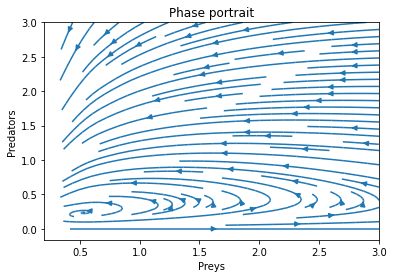

In [17]:
### PHASE PORTAIT OF UNSTABLE DATA
phase_plot(functions, 3, 10)

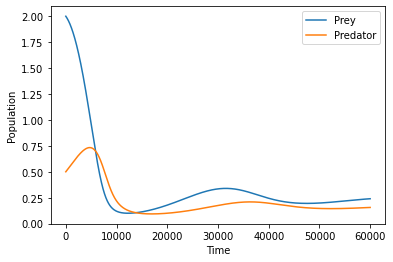

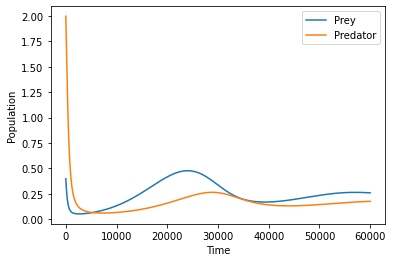

In [14]:
Y1 = [2.0, 0.5]
Y2 = [0.4, 2.0]
### PLOT OF UNSTABLE DATA
solver = runge_kutta_method(functions, 60, 0, Y1)
solver2 = runge_kutta_method(functions, 60, 0, Y2)

data_plot = []
data_plot2 = []

data_plot_2 = []
data_plot2_2 = []

for i in range(0,len(solver)):
    data_plot.append(solver[i][0])
    data_plot2.append(solver[i][1])

    
for i in range(0,len(solver2)):
    data_plot_2.append(solver2[i][0])
    data_plot2_2.append(solver2[i][1])

plt.plot(data_plot,label="Prey")
plt.plot(data_plot2,label="Predator")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(loc='upper right')
plt.show()

plt.plot(data_plot_2,label="Prey")
plt.plot(data_plot2_2,label="Predator")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(loc='upper right')
plt.show()

As we can see for our data model is quite unstable. We chose paramtires, which handicaps model to stablize as seen in the end.

### Real Data

<AxesSubplot:xlabel='Year'>

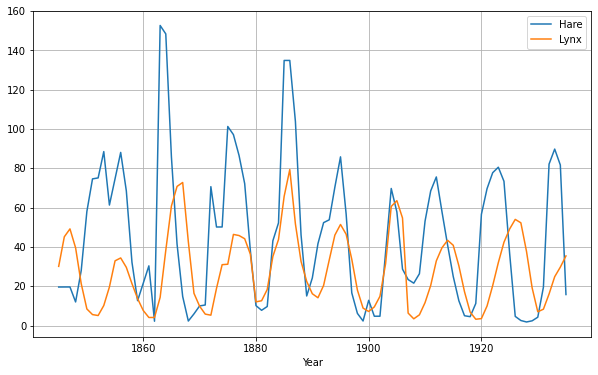

In [121]:
import pandas as pd

#Real data plot

url = 'http://people.whitman.edu/~hundledr/courses/M250F03/LynxHare.txt'
df = pd.read_csv(url, delim_whitespace=True, header=None, index_col=0)
df.index.name = 'Year'
df.columns = ['Hare', 'Lynx']
df.plot(figsize=(10,6), grid=True)

We present a real data for model predator-prey. <br>
As we can see our model are far from being accurate, but they do show us some intuition of interactons beetwen species.
In our model we have included thoses oscilation of data, but our soultion isn't as precise in real-life data as it could be. Perhaps if the real-life model would be made in more isolated area, we might see apprience of stabilizing tendency.

### Competition

Here we want to describe a situation when two species compete for limitted terrority or food resources. They inhibit the growth of each other. Considering two species with logistic growth we have the system of equations

\begin{equation}
    \begin{cases}
        \frac{dN}{dt} = Nr(1- \frac{N}{K_1} - a_1\frac{P}{K_1}) \\
        \frac{dP}{dt} = Ps(1- \frac{N}{K_2} - a_2\frac{N}{K_2})
    \end{cases}
\end{equation}

where $ r, s $ represent birth rate, $ K_1, K_2 $ are the carrying capacity and $ a_1, a_2 $ measure the competitive effect. All of them are positive constants.

To find critical points of the system we solve the equation analytically. 

We have four possibilities:
\begin{equation}
    \begin{cases}
        N = 0 \\
        P = 0
    \end{cases}
    \quad \lor \quad
    \begin{cases}
        N = K_1 \\
        P = 0
    \end{cases}
    \quad \lor \quad
    \begin{cases}
        N = 0 \\
        P = K_2
    \end{cases}
    \quad \lor \quad
    \begin{cases}
        N = \frac{K_1 - a_1K_2}{1 - a_1a_2} \\
        P = \frac{K_2 - a_2K_1}{1 - a_1a_2}
    \end{cases}
\end{equation}

The last one exist only if $ a_1a_2 \neq 1 $ and $ rN, sP \geq 0 $

In this section we will analize different cases due to the parameter describing competitive efect ($a1, a2$). 
- $a1, a2 >0 $.

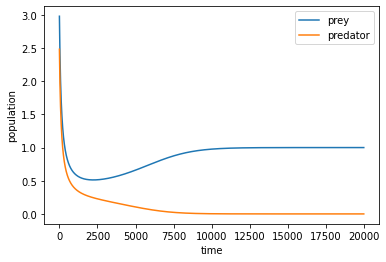

In [29]:
r= 1.0; s = 1.0
k1 = 1.0; k2 = 1.0
a1 = 2.0; a2 = 2.0

Y1 = [3.0, 2.5]

#F -> (t, N, P)
competitions = [lambda F: F[1] * r * (1 - F[1] / k1 - a1 * F[2] / k1),
                lambda F: F[2] * s * (1 - F[2] / k2 - a2 *  F[1] / k2)]

solver = runge_kutta_method(competitions, 20, 0, Y1)

data_plot = []
data_plot2 = []

for i in range(0,len(solver)):
    data_plot.append(solver[i][0])
    data_plot2.append(solver[i][1])

plt.plot(data_plot,label="prey")
plt.plot(data_plot2,label="predator")
plt.xlabel("time")
plt.ylabel("population")
plt.legend(loc='upper right')
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_768/267823597.py:9: RuntimeWarning: invalid value encountered in true_divide
  U = dvx / np.sqrt(dvx**2 + dvy**2)
C:\Users\user\AppData\Local\Temp/ipykernel_768/267823597.py:10: RuntimeWarning: invalid value encountered in true_divide
  V = dvy / np.sqrt(dvx**2 + dvy**2)


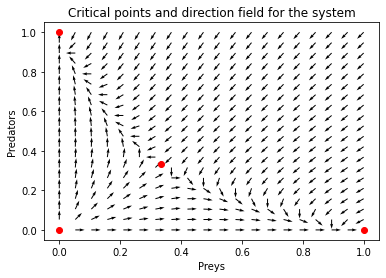

In [30]:
direction_field(competitions, 1, 20)
prey = [0, 0, k1, (k1 - a1*k2) / (1 - a1 * a2)]
pred = [0, k2, 0, (k2 - a2*k1) / (1 - a1 * a2)]
plt.scatter(prey, pred, c='red')

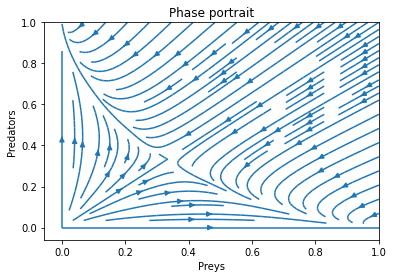

In [31]:
### PHASE PORTAIT
phase_plot(competitions, 1, 10)

We see the line - separatrix - which divide into two regions:  an upper portion where trajectories approach a limiting
line from above and a lower portion from which trajectories approach
the same limiting line from below. It is seen that it is a trajectory which starts from the amount of 
Population to the point on the axis representing Preys - population that will be excluded and finishes.

If population of one species is significantly more than the other species, this species survive. 

- $ a_1 < 1 $ and $ a_2 > 1 $. 

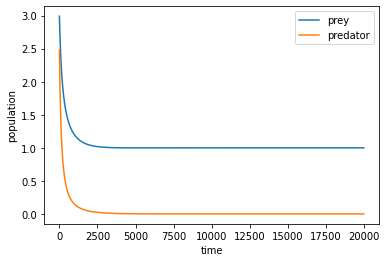

In [34]:
r= 1.0; s = 1.0
k1 = 1.0; k2 = 1.0
a1 = 0.5; a2 = 2.0

Y1 = [3.0, 2.5]

#F -> (t, N, P)
competitions = [lambda F: F[1] * r * (1 - F[1] / k1 - a1 * (F[2] / k1)),
                lambda F: F[2] * s * (1 - F[2] / k2 - a2 *  F[1] / k2)]

solver = runge_kutta_method(competitions, 20, 0, Y1)

data_plot = []
data_plot2 = []

for i in range(0,len(solver)):
    data_plot.append(solver[i][0])
    data_plot2.append(solver[i][1])

plt.plot(data_plot,label="prey")
plt.plot(data_plot2,label="predator")
plt.xlabel("time")
plt.ylabel("population")
plt.legend(loc='upper right')
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_768/267823597.py:9: RuntimeWarning: invalid value encountered in true_divide
  U = dvx / np.sqrt(dvx**2 + dvy**2)
C:\Users\user\AppData\Local\Temp/ipykernel_768/267823597.py:10: RuntimeWarning: invalid value encountered in true_divide
  V = dvy / np.sqrt(dvx**2 + dvy**2)


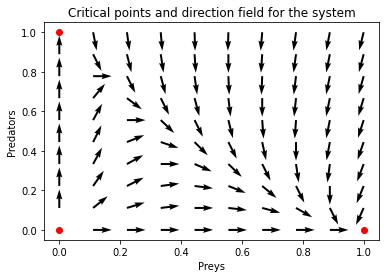

In [35]:
direction_field(competitions, 1, 10)
prey = [0, 0, k1]
pred = [0, k2, 0]
plt.scatter(prey, pred, c='red')

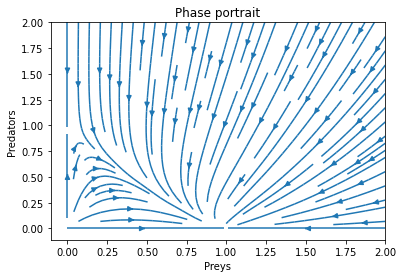

In [36]:
phase_plot(competitions, 2, 10)

The weaker of the species dies and stronger survives. Solution tends to capacity for stronger species.

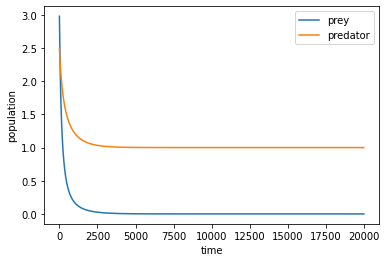

In [37]:
r= 1.0; s = 1.0
k1 = 1.0; k2 = 1.0
a1 = 2.0; a2 = 0.2

Y1 = [3.0, 2.5]

#F -> (t, N, P)
competitions = [lambda F: F[1] * r * (1 - F[1] / k1 - a1 * (F[2] / k1)),
                lambda F: F[2] * s * (1 - F[2] / k2 - a2 *  F[1] / k2)]

solver = runge_kutta_method(competitions, 20, 0, Y1)

data_plot = []
data_plot2 = []

for i in range(0,len(solver)):
    data_plot.append(solver[i][0])
    data_plot2.append(solver[i][1])

plt.plot(data_plot,label="prey")
plt.plot(data_plot2,label="predator")
plt.xlabel("time")
plt.ylabel("population")
plt.legend(loc='upper right')
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_768/267823597.py:9: RuntimeWarning: invalid value encountered in true_divide
  U = dvx / np.sqrt(dvx**2 + dvy**2)
C:\Users\user\AppData\Local\Temp/ipykernel_768/267823597.py:10: RuntimeWarning: invalid value encountered in true_divide
  V = dvy / np.sqrt(dvx**2 + dvy**2)


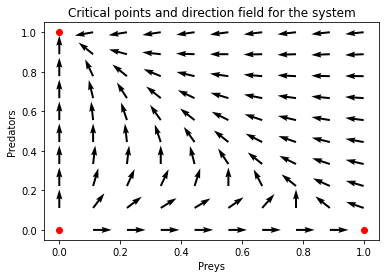

In [38]:
direction_field(competitions, 1, 10)
prey = [0, 0, k1]
pred = [0, k2, 0]
plt.scatter(prey, pred, c='red')

C:\Users\user\AppData\Local\Temp/ipykernel_13188/1551291355.py:9: RuntimeWarning: invalid value encountered in true_divide
  U = dvx / np.sqrt(dvx**2 + dvy**2)
C:\Users\user\AppData\Local\Temp/ipykernel_13188/1551291355.py:10: RuntimeWarning: invalid value encountered in true_divide
  V = dvy / np.sqrt(dvx**2 + dvy**2)


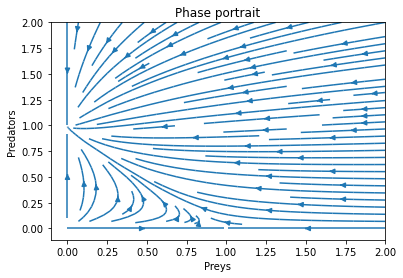

In [122]:
phase_plot(competitions, 2, 10)

In this case we have symmetric situation to the previous one. 

- $a1, a2 < 1$.

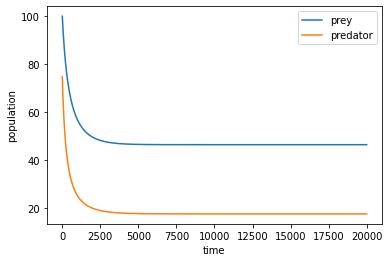

In [45]:
r= 1.0; s = 1.0
k1 = 50.0; k2 = 20.0
a1 = 0.2; a2 = 0.05

Y1 = [100.0, 75.0]

#F -> (t, N, P)
competitions = [lambda F: F[1] * r * (1 - F[1] / k1 - a1 * F[2] / k1),
                lambda F: F[2] * s * (1 - F[2] / k2 - a2 *  F[1] / k2)]


solver = runge_kutta_method(competitions, 20, 0, Y1)

data_plot = []
data_plot2 = []

for i in range(0,len(solver)):
    data_plot.append(solver[i][0])
    data_plot2.append(solver[i][1])

plt.plot(data_plot,label="prey")
plt.plot(data_plot2,label="predator")
plt.xlabel("time")
plt.ylabel("population")
plt.legend(loc='upper right')
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_768/267823597.py:9: RuntimeWarning: invalid value encountered in true_divide
  U = dvx / np.sqrt(dvx**2 + dvy**2)
C:\Users\user\AppData\Local\Temp/ipykernel_768/267823597.py:10: RuntimeWarning: invalid value encountered in true_divide
  V = dvy / np.sqrt(dvx**2 + dvy**2)


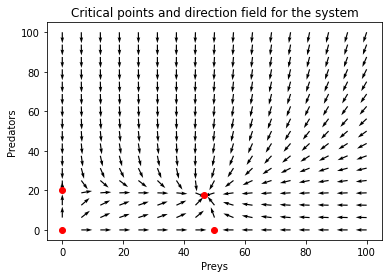

In [47]:
direction_field(competitions, 100, 17)
prey = [0, 0, k1, (k1 - a1*k2) / (1 - a1 * a2)]
pred = [0, k2, 0, (k2 - a2*k1) / (1 - a1 * a2)]
plt.scatter(prey, pred, c='red')

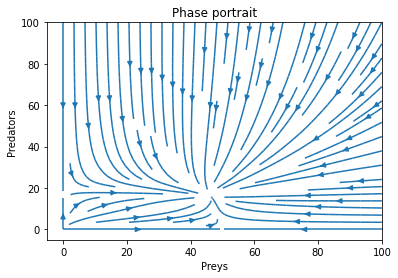

In [48]:
phase_plot(competitions, 100, 10)

Competition has low impact on populations and both of species survive. Their populations stabilize under the capacity for each of them.

### Comparison  

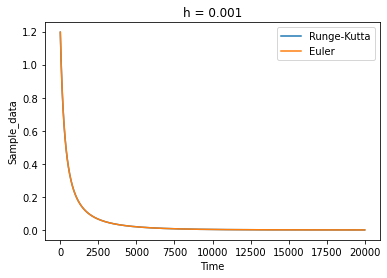

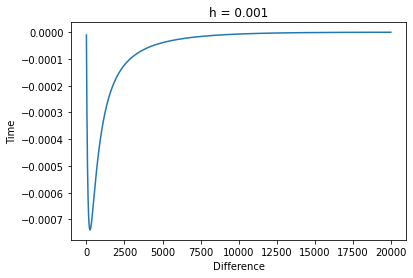

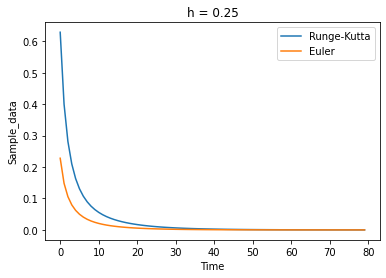

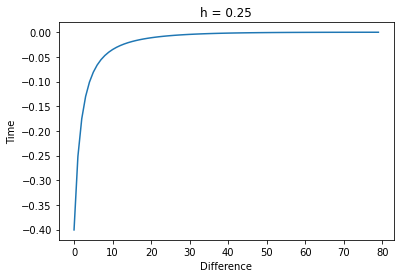

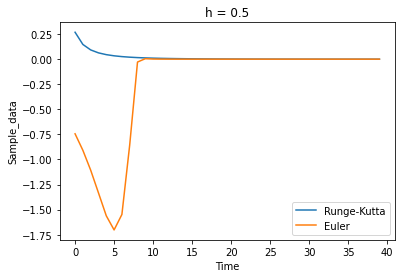

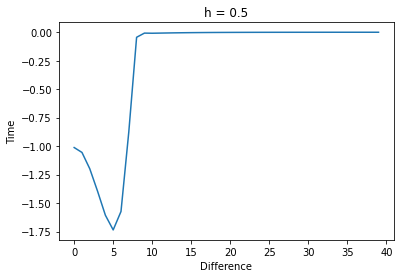

In [21]:
r= 0.3; s = 0.6
k1 = 0.8; k2 = 0.5
a1 = 1.5; a2 = 1.0


competitions = [lambda F: F[1] * r * (1 - F[1] / k1 - a1 * F[2] / k1),
                lambda F: F[2] * s * (1 - F[2] / k2 - a2 *  F[1] / k2)]


Y = [2.0, 1.2]
Y2 = [2.0, 1.2]
Y3 = [2.0, 1.2]
# For each case we have solver and list of data
solver_kuta_1 = runge_kutta_method(competitions, 20, 0, Y)
solver_euler_1 = calculate_euler_method(competitions, 20, 0, Y)

data_plot_kuta_test_data_1 = []
data_plot_euler_test_data_1 = []

solver_kuta_2 = runge_kutta_method(competitions, 20, 0, Y2, 0.25)
solver_euler_2 = calculate_euler_method(competitions, 20, 0, Y2, 0.25)

data_plot_kuta_test_data_2 = []
data_plot_euler_test_data_2 = []

solver_kuta_3 = runge_kutta_method(competitions, 20, 0, Y3, 0.5)
solver_euler_3 = calculate_euler_method(competitions, 20, 0, Y3, 0.5)

data_plot_kuta_test_data_3 = []
data_plot_euler_test_data_3 = []


for i in range(0,len(solver_kuta_1)):
    data_plot_kuta_test_data_1.append(solver_kuta_1[i][1])
    data_plot_euler_test_data_1.append(solver_euler_1[i][1])
    
for i in range(0,len(solver_kuta_2)):    
    data_plot_kuta_test_data_2.append(solver_kuta_2[i][1])
    data_plot_euler_test_data_2.append(solver_euler_2[i][1])
    
for i in range(0,len(solver_kuta_3)):    
    data_plot_kuta_test_data_3.append(solver_kuta_3[i][1])
    data_plot_euler_test_data_3.append(solver_euler_3[i][1])


### Now we calculate differences 

difference_1 = []
zip_object_1 = zip(data_plot_kuta_test_data_1, data_plot_euler_test_data_1)

difference_2 = []
zip_object_2 = zip(data_plot_kuta_test_data_2, data_plot_euler_test_data_2)

difference_3 = []
zip_object_3 = zip(data_plot_kuta_test_data_3, data_plot_euler_test_data_3)

for list1_i, list2_i in zip_object_1:
    difference_1.append(list2_i-list1_i)
    
for list1_i, list2_i in zip_object_2:
    difference_2.append(list2_i-list1_i)
    
for list1_i, list2_i in zip_object_3:
    difference_3.append(list2_i-list1_i)

### Now plot the results
plt.plot(data_plot_kuta_test_data_1, label = "Runge-Kutta")
plt.plot(data_plot_euler_test_data_1, label = "Euler")
plt.title("h = 0.001")
plt.xlabel("Time")
plt.ylabel("Sample_data")
plt.legend(loc='upper right')
plt.show()

plt.plot(difference_1)
plt.title("h = 0.001")
plt.xlabel("Difference")
plt.ylabel("Time")
plt.show()

plt.plot(data_plot_kuta_test_data_2, label = "Runge-Kutta")
plt.plot(data_plot_euler_test_data_2, label = "Euler")
plt.title("h = 0.25")
plt.xlabel("Time")
plt.ylabel("Sample_data")
plt.legend(loc='upper right')
plt.show()

plt.plot(difference_2)
plt.title("h = 0.25")
plt.xlabel("Difference")
plt.ylabel("Time")
plt.show()

plt.plot(data_plot_kuta_test_data_3, label = "Runge-Kutta")
plt.plot(data_plot_euler_test_data_3, label = "Euler")
plt.title("h = 0.5")
plt.xlabel("Time")
plt.ylabel("Sample_data")
plt.legend(loc='lower right')
plt.show()

plt.plot(difference_3)
plt.title("h = 0.5")
plt.xlabel("Difference")
plt.ylabel("Time")
plt.show()

To make used comparison between Runge-Kutta 4th order method and Euler method we used competition equations with the same data but diffrent step $(h = 0.001,0.25,0.5)$. 

<ol>
  <li>First two figures show more accurent soultion, there are very small diffrencies. <em>0.001</em>
    </li>
  <li>Next two figures show less precies soultion (smaller step), diffrencies are visibile. <em>0.25</em></li>
  <li>Last two figures show inaccurate Euler method soultion, diffrencies are huge! <em>0.5</em></li>
    For each case we included underneath a difference figure.
</ol>
For small $h$ Euler method doesn't work as good as we might expect.
On ther other hand we see that for lager $h$ it is more detailed and accurate.

### Functions in use

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=22)

In [2]:
def evaluate(array, X, Y):
    return np.array([function((X, Y[0], Y[1])) for function in array],dtype='d')

In [3]:
def calculate_euler_method(F,x,X,Y,h=1e-3):

    n = round(x/h)
    tmp = np.array([0,0], dtype='d')
    for i in range(n):
        Y = Y + evaluate(F, X, Y) * h
        X += h
        tmp = np.vstack((tmp, Y))
        
    return tmp[1:]


In [4]:
def runge_kutta_method(F, x, X, Y, h=1e-3):

    n = round(x/h)
    tmp = np.array([0,0], dtype='g')
    for i in range(n):
        part_1 = evaluate(F, X, Y)
        part_2 = evaluate(F, X + 1/2 * h,  Y + 1/2 * h * part_1 )
        part_3 = evaluate(F, X + 1/2 * h,  Y + 1/2 * h * part_2)
        part_4 = evaluate(F, X + h, Y + h * part_3)

        Y = Y + h / 6 * (part_1 + 2*part_2 + 2*part_3 + part_4)
        X += h
        tmp = np.vstack((tmp, Y))
        
    return tmp[1:]

In [5]:
def phase_plot(f, param, num_grid_points):
    x_ = np.linspace(0, param, num_grid_points)                                                             
    y_ = x_

    X, Y = np.meshgrid(x_, y_)
    dvx, dvy = f[0]([0, X, Y]), f[1]([0, X, Y])
  
    plt.title("Phase portrait")
    plt.xlabel("Preys")
    plt.ylabel("Predators")

    plt.streamplot(X, Y, dvx, dvy)

In [6]:
def direction_field(f, param, num_grid_points):
    x_ = np.linspace(0, param, num_grid_points)                                                             
    y_ = x_

    X, Y = np.meshgrid(x_, y_)
    dvx, dvy = f[0]([0, X, Y]), f[1]([0, X, Y])
    
    # Normalize the arrows
    U = dvx / np.sqrt(dvx**2 + dvy**2)
    V = dvy / np.sqrt(dvx**2 + dvy**2)
    
    plt.title("Critical points and direction field for the system")
    plt.xlabel("Preys")
    plt.ylabel("Predators")
       
    plt.quiver(X, Y, U, V)

### References:

- Kincaid, Cheney (2006), Analiza Numeryczna
- Murray, J. D. (2002), Mathematical Biology
- Foryś Urszula (2005), Matematyka w biologii

- http://people.whitman.edu/~hundledr/courses/M250F03/LynxHare.txt